In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Statistical Analysis


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

In [ ]:
mean = data[numeric_columns].mean()
mean

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [ ]:
median = data[numeric_columns].median()
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
data.mode()


,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [ ]:
#used to display the basic statistics on the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
std = data[numeric_columns].std()
std

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [ ]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Handling Null Values

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Code for handlling with Null values
data['age'].fillna(data['age'].mean(),inplace=True)

Data Visualization

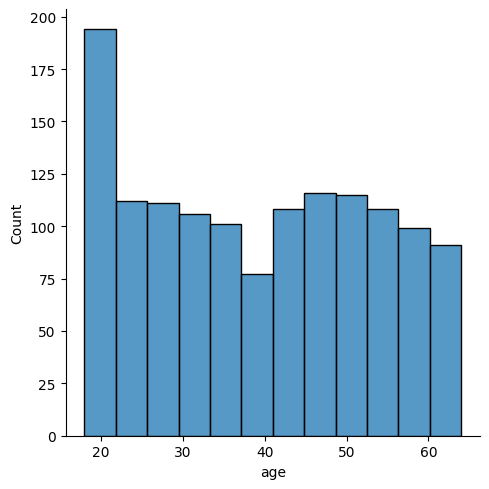

In [ ]:
sns.displot(data['age'])

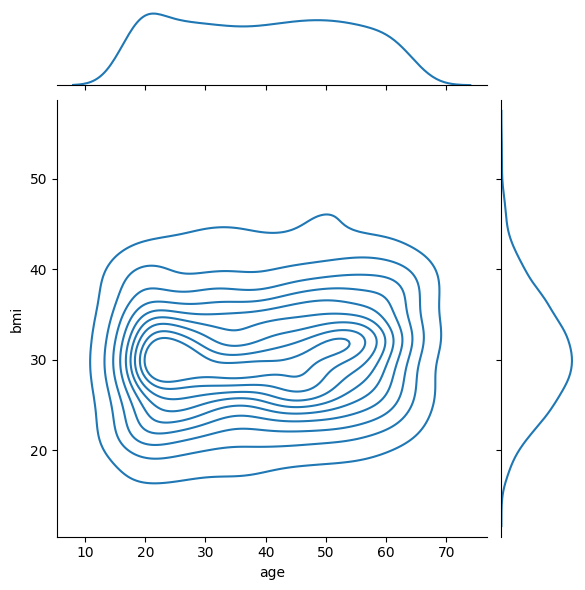

In [ ]:
sns.jointplot(x=data['age'], y=data['bmi'], kind="kde")

<Axes: xlabel='age', ylabel='charges'>

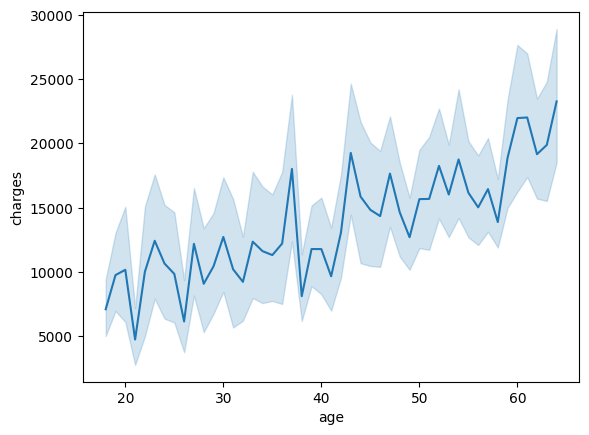

In [ ]:

sns.lineplot(x=data['age'], y=data['charges'])


<Axes: ylabel='bmi'>

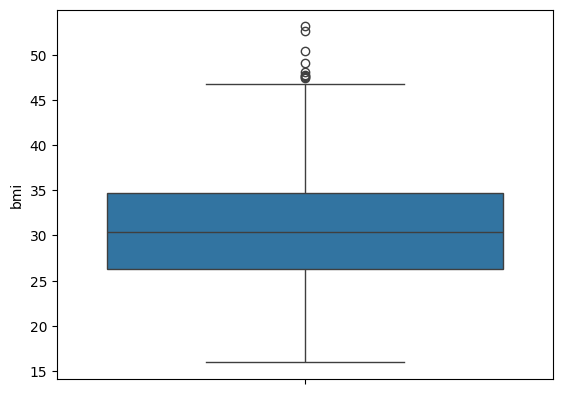

In [ ]:
sns.boxplot(data['bmi'])

Steps to Detect Outliers


Calculate first(q1) and third quartile(q3)

In [ ]:
q1 = data['age'].quantile(0.25)
q1

27.0

In [ ]:
q3 = data['age'].quantile(0.75)
q3

51.0

In [ ]:
IQR = q3-q1
IQR

24.0

Find lowerBound

In [ ]:
lowerBound=q1-1.5*IQR
lowerBound

14.403749999999999

Find upperBound

In [ ]:
upperBound=q3 + 1.5*IQR
upperBound

63.59625

In [ ]:
IQR = data['age'].quantile(0.75)-data['age'].quantile(0.25)
IQR

24.0

In [ ]:
lowerBound=data['age'].quantile(0.25)-(1.5*IQR)
lowerBound

-9.0

In [ ]:
upperBound=data['age'].quantile(0.75)+(1.5*IQR)
upperBound

63.59625

In [ ]:

data['age']=np.where(data['age']>upperBound,upperBound,data['age'])
data['age']=np.where(data['age']<lowerBound,lowerBound,data['age'])

<Axes: ylabel='age'>

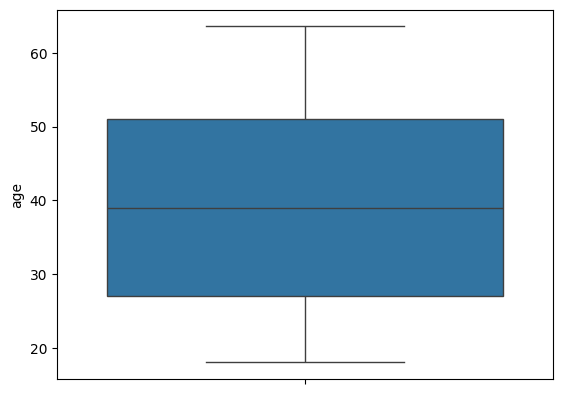

In [ ]:

sns.boxplot(data['age'])

# There are no outliers in age column.It is cleaned data



LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520



Seperating Data


In [ ]:
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]


x

,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-1.43948358, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.51074378,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79814179,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.51074378, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29696318, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55344478, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [ ]:
X = pd.DataFrame(x)
X



,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3
